## 分形曲线之IFS植物形态曲线
不是题目要求的，是网上找的，见py文件

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time
import threading
from time import sleep
from matplotlib.animation import FuncAnimation
# 蕨类植物叶子的迭代函数和其概率值
eq1 = np.array([[0,0,0],[0,0.16,0]])
p1 = 0.01

eq2 = np.array([[0.2,-0.26,0],[0.23,0.22,1.6]])
p2 = 0.07

eq3 = np.array([[-0.15, 0.28, 0],[0.26,0.24,0.44]])
p3 = 0.07

eq4 = np.array([[0.85, 0.04, 0],[-0.04, 0.85, 1.6]])
p4 = 0.85

def ifs(p, eq, init, n):
    """
        进行函数迭代
        p: 每个函数的选择概率列表
        eq: 迭代函数列表
        init: 迭代初始点
        n: 迭代次数

        返回值： 每次迭代所得的X坐标数组， Y坐标数组， 计算所用的函数下标    
        """

    # 迭代向量的初始化
    pos = np.ones(3, dtype=np.float)
    pos[:2] = init

    # 通过函数概率，计算函数的选择序列
    p = np.add.accumulate(p)    
    rands = np.random.rand(n)
    selec = np.ones(n, dtype=np.int)*(n-1)
    for i, x in enumerate(p[::-1]):
        selec[rands<x] = len(p)-i-1

    # 结果的初始化
    result = np.zeros((n,2), dtype=np.float)
    c = np.zeros(n, dtype=np.float)

    for i in range(n):
        eqidx = selec[i] # 所选的函数下标
        tmp = np.dot(eq[eqidx], pos) # 进行迭代
        pos[:2] = tmp # 更新迭代向量

    # 保存结果
        result[i] = tmp
        c[i] = eqidx

    return result[:,0], result[:, 1], c

start = time.clock()
x, y, c = ifs([p1,p2,p3,p4],[eq1,eq2,eq3,eq4], [0,0], 100000)
# print(len(x),y)
time.clock() - start

C:\Users\wwwwww931121\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:57: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\wwwwww931121\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:60: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


0.3791645999999673

C:\Users\wwwwww931121\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\wwwwww931121\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


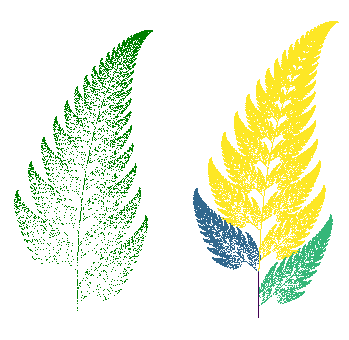

In [24]:
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(121)
plt.axis("equal")
plt.axis("off")
ax = plt.subplot(122)
plt.axis("equal")
plt.axis("off")
pool_size = 2

control = [0,0]
runtime_data = [[[],[],[]],[[],[],[]]]
xlen = len(x)
def animate(_):
    for i in range(pool_size):
        # print(control[i])

        runtime_data[i] = [x[0:control[i]+1],y[0:control[i]+1],c[0:control[i]+1]]
            # print(3,i,len(runtime_data[i][0]),len(runtime_data[i][1]))
        # print(4,i,len(runtime_data[i][0]),len(runtime_data[i][1]))
        if i==0:
            ax = plt.subplot(121)
            # print(5,i,len(runtime_data[i][0]),len(runtime_data[i][1]))
            scatt = plt.scatter(runtime_data[i][0], runtime_data[i][1], s=1, c="g", marker="s", linewidths=0)
        else:
            ax = plt.subplot(122)
            scatt = plt.scatter(runtime_data[i][0], runtime_data[i][1], s=1,c = runtime_data[i][2], marker="s", linewidths=0)
    ax.figure.canvas.draw()
    return scatt,
ani = FuncAnimation(fig, animate, interval=2, blit=True)
def dataUpdate_thead(i):
    while True:
        # print(i)
        control[i] = (control[i]+1)%xlen
        # sleep(0.00001)
ad_rdy_ev = threading.Event()
ad_rdy_ev.set()  # 设置线程运行
for i in range(pool_size):
    ti = threading.Thread(target=dataUpdate_thead, args=(i,))
    ti.daemon = True
    ti.start()

plt.show()